In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, sin
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from copy import copy
%matplotlib inline

# Ex 1
Exploring imshow..

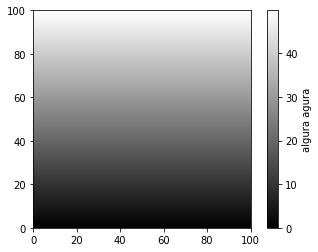

In [2]:
from math import sqrt, sin, pi 
from numpy import empty 
from pylab import imshow, gray, show, colorbar

side = 100
points = 500
spacing = side/points
xi = empty([points, points], float)

for i in range(points):
    y = spacing*i
    for j in range(points):
        x = spacing*j
        xi[i, j] = 0.1*i


plot = imshow(xi, origin="lower", extent=[0, side, 0, side])
cb = colorbar(plot)
cb.set_label("algura agura")
gray()
show()

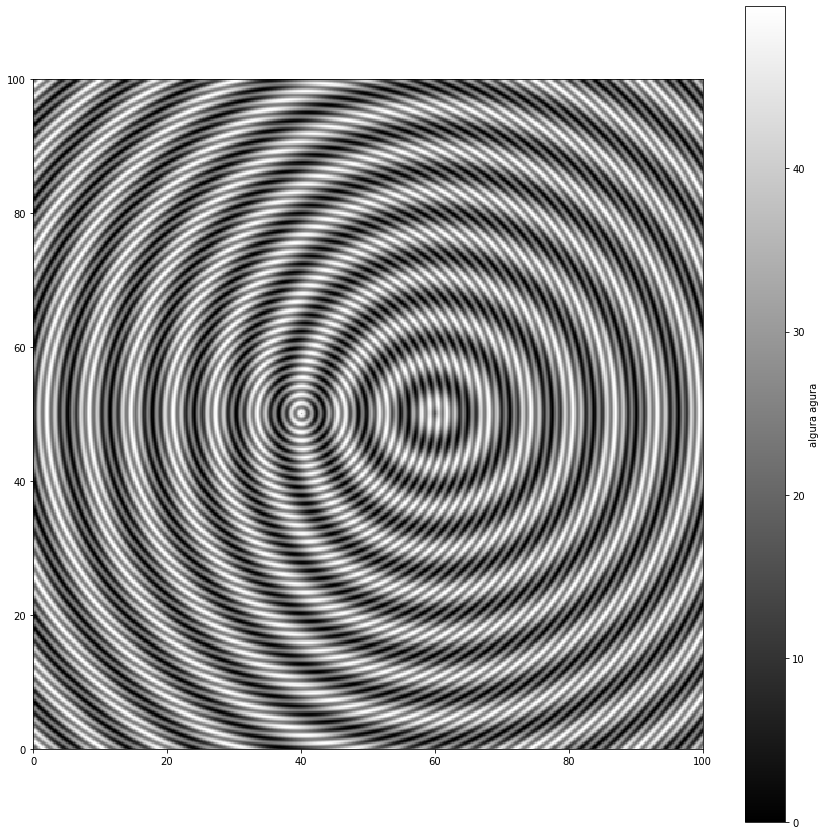

In [54]:
from math import sqrt, sin, pi 
from numpy import empty 
from pylab import imshow, gray, show, colorbar

side = 100
points = 500
spacing = side/points
xi = empty([points, points], float)

k1, k2 = 5, 1
a1, a2 = 1, 1

def onda(x, y, x0, y0, a, k):
    r = sqrt((x-x0)**2 + (y-y0)**2)
    return a*sin(k*r)

for i in range(points):
    y = spacing*i
    for j in range(points):
        x = spacing*j
        xi[i, j] = onda(x,y, 40, 50, a1, k1)+onda(x,y, 60, 50, a2, k2)

fig, ax = plt.subplots(figsize=(15, 15))


ax.imshow(xi, origin="lower", extent=[0, side, 0, side])
cb = colorbar(plot)
cb.set_label("algura agura")
gray()
show()

# Ex 2
## Foi para entrega

# Ex 3

In [3]:
# Load data
dados = pd.read_csv("millikan.txt", delimiter=' ')
dados = np.array(dados)

In [87]:
# Calcular o ajuste de dados
x, y = dados[:,0], dados[:, 1]
 
delta = len(x) * sum(x**2) - sum(x)**2
a = (sum(x**2) * sum(y) - sum(x) * sum(x*y)) / delta
b = (len(x) * sum(x*y) - sum(x) * sum(y)) / delta

a, b

(-1.7312358039813585, 4.088227358517512e-15)

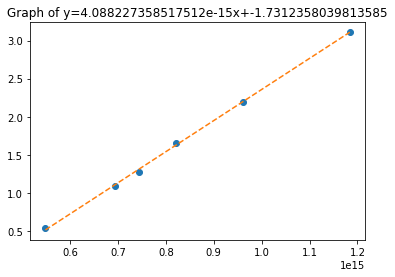

In [92]:
plt.title(f'Graph of y={b}x+{a}')
plt.plot(dados[:,0], dados[:, 1],  'o')
plt.plot(dados[:,0], [b*i+a for i in dados[:,0]], '--')

# Ex 4

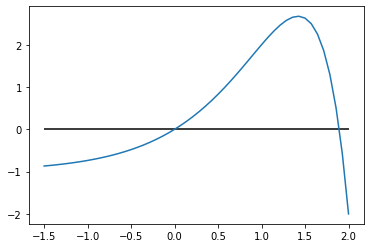

In [101]:
def eq(x):
    return 4**x - 3**(2*x) + 2**(3*x) -1

x = np.linspace(-1.5, 2)
plt.hlines(y=0, xmin=-1.5, xmax=2)
plt.plot(x, eq(x))  

In [103]:
# metodo da bissessão

def bissess(eq, p1=-2, p2=2):
    # p1 e p2 são palpites

    if eq(p1) * eq(p2) <= 0:
        # Significa que temos um 0 aqui no meio!
        delta = abs((p1-p2) / 2)
        return [bissess(eq, p1, p2-delta), bissess(eq, p1+delta, p2-delta)]
    else: 
        return p1

bissess(eq)

-2

## Ex 6

In [3]:
import numpy as np


def invertermat(matrix):
    n = matrix.shape[0]
    inverted = np.identity(n)


      # N será o tamanho da matriz
    n = matrix.shape[0]

    ## Colocar o triangulo inferior a 0's
    # Para cada linha da matriz..
    for line in range(n):
        # Dividir a linha pelo seu pivot 
        # de modo a ter a diagonal = 1
        pivot = matrix[line][line]
        matrix[line] = matrix[line]/pivot
        inverted[line] =  inverted[line]/pivot

        # Para cada uma das linhas por baixo
        # do pivot, vamos subtrair à linha
        # a linha do nosso pivot * uma constante, 
        # de modo a que, na coluna do pivot, por baixo deste
        # apenas haja zeros
        for other_line in range(n-line-1):
            # Queremos que no lugar do 'pivot_atual' seja 0
            pivot_atual = matrix[other_line+line+1][line]
            matrix[other_line+line+1] = matrix[other_line+line+1] - (pivot_atual/1) * matrix[line]
            inverted[other_line+line+1] = inverted[other_line+line+1] - (pivot_atual/1) * inverted[line]


    ## Colocar o triangulo superior a 0's
    # Agora vamos começar de baixo para cima ou seja,
    # para cada linha a cima de cada pivot (o 1 na diagonal)
    # vamos subtrair a linha atual * uma constante de modo a que
    # em cima de cada 1 na diagonal, haja só 0's
    for line in range(1, n, 1):
        for other_line in range(1, n-line+1, 1):
            # Queremos que no lugar do 'pivot_atual' seja 0
            pivot_atual =  matrix[-other_line-line][-line]
            matrix[-other_line-line] = matrix[-other_line-line] - (pivot_atual) * matrix[-line]
            inverted[-other_line-line] = inverted[-other_line-line] - (pivot_atual) * inverted[-line]
        

    
    return inverted


invertermat(np.array([
    [7, 3, -1, 2], 
    [3, 8, 1, 4], 
    [-1, 1, 4, -1], 
    [2, -4, -1, 6]]
, dtype=np.float64))

array([[ 0.18515685, -0.07727621,  0.06579954,  0.00076511],
       [-0.03442999,  0.10941086, -0.05355777, -0.07039021],
       [ 0.0351951 , -0.02295333,  0.27697016,  0.04973221],
       [-0.07880643,  0.09487376, -0.01147666,  0.12777353]])

## Ex 7

In [43]:
def triangular_sup(matrix):
    from copy import copy
    matrix = copy(matrix)
    n = matrix.shape[0]
    ## Colocar o triangulo inferior a 0's
    # Para cada linha da matriz..
    for line in range(n):
        # Dividir a linha pelo seu pivot 
        # de modo a ter a diagonal = 1
        pivot = matrix[line][line]
        #matrix[line] = matrix[line]/pivot
        #inverted[line] =  inverted[line]/pivot

        # Para cada uma das linhas por baixo
        # do pivot, vamos subtrair à linha
        # a linha do nosso pivot * uma constante, 
        # de modo a que, na coluna do pivot, por baixo deste
        # apenas haja zeros
        for other_line in range(n-line-1):
            # Queremos que no lugar do 'pivot_atual' seja 0
            pivot_atual = matrix[other_line+line+1][line]
            matrix[other_line+line+1] = matrix[other_line+line+1] - (pivot_atual/pivot) * matrix[line]
            #inverted[other_line+line+1] = inverted[other_line+line+1] - (pivot_atual/1) * inverted[line]

    return matrix

def triangular_inf(matrix):
    from copy import copy
    matrix = copy(matrix)
    n = matrix.shape[0]
    ## Colocar o triangulo superior a 0's
    # Agora vamos começar de baixo para cima ou seja,
    # para cada linha a cima de cada pivot (o 1 na diagonal)
    # vamos subtrair a linha atual * uma constante de modo a que
    # em cima de cada 1 na diagonal, haja só 0's
    for line in range(1, n+1, 1):
        pivot = matrix[-line][-line]
        matrix[-line] = matrix[-line] / pivot
        for other_line in range(1, n-line+1, 1):
            # Queremos que no lugar do 'pivot_atual' seja 0
            pivot_atual =  matrix[-other_line-line][-line]
            matrix[-other_line-line] = matrix[-other_line-line] - (pivot_atual) * matrix[-line]
            #inverted[-other_line-line] = inverted[-other_line-line] - (pivot_atual) * inverted[-line]
            
    return matrix


## ISTO TA MAL A TRIANGULALR INFERIOR NAO FUNCIONA

In [45]:
matrix = np.array([
    [7, 3, -1, 2], 
    [3, 8, 1, 4], 
    [-1, 1, 4, -1], 
    [2, -4, -1, 6]]
, dtype=np.float64)

U = triangular_sup(matrix)
U

array([[ 7.        ,  3.        , -1.        ,  2.        ],
       [ 0.        ,  6.71428571,  1.42857143,  3.14285714],
       [ 0.        ,  0.        ,  3.55319149, -1.38297872],
       [ 0.        ,  0.        ,  0.        ,  7.82634731]])

In [46]:
L = triangular_inf(matrix)
L

array([[ 1.        ,  0.4305609 , -0.11126427,  0.21771623],
       [ 0.33933855,  1.        ,  0.09918942,  0.40468584],
       [-0.23776224,  0.22377622,  1.        , -0.20979021],
       [ 0.33333333, -0.66666667, -0.16666667,  1.        ]])

In [47]:
L @ U

array([[ 7.        ,  5.89090892, -0.78025625,  5.21099035],
       [ 2.37536983,  7.73230136,  1.44167189,  6.85156933],
       [-1.66433566,  0.78921079,  4.11063405, -2.79709754],
       [ 2.33333333, -3.47619048, -1.87791287,  6.62827233]])

In [ ]:
def LUdecomp(a):
    n = len(a)
    for k in range(0, n-1):
        for i in range(k+1, n):
             lam = a[i,k]/a[k,k]
             a[i, k+1;n] = a[i,k+1:n] - lam*a[k]


In [50]:
# GABI
def lu(x):
    l=len(x[1])
    a=x.copy()
    b=x.copy()

    for k in range(0,l): 
        for i in range(k+1,l,1):
            # guarda-se o primeiro elemento não nulo de cada linha
            c=a[i][k] 
            for j in range(k,l,1):
                # subtrai-se a linha i as linhas abaixo de i 
                # de forma a anular o primeiro elemento não nulo de cada linha
                a[i][j]=a[i][j]-c*((a[k][j])/a[k][k])
    for k in range(0,l):
        c=(a[k][k]).copy()
        a[k]=a[k]/c

    for k in range(l-1,-1,-1): 
        for i in range(k-1,-1,-1):
            # guarda-se o primeiro elemento não nulo de cada linha
            c=b[i][k] 
            for j in range(k,-1,-1):
                # subtrai-se a linha i as linhas abaixo de i 
                # de forma a anular o primeiro elemento não nulo de cada linha
                b[i][j]=b[i][j]-c*((b[k][j])/b[k][k])
      
            
            
    return a,b


matrix = np.array([
    [7, 3, -1, 2], 
    [3, 8, 1, 4], 
    [-1, 1, 4, -1], 
    [2, -4, -1, 6]]
, dtype=np.float64)

lu(matrix)

(array([[ 1.        ,  0.42857143, -0.14285714,  0.28571429],
        [ 0.        ,  1.        ,  0.21276596,  0.46808511],
        [ 0.        ,  0.        ,  1.        , -0.38922156],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[ 5.40082645,  0.        ,  0.        ,  0.        ],
        [ 1.95652174, 10.52173913,  0.        ,  0.        ],
        [-0.66666667,  0.33333333,  3.83333333,  0.        ],
        [ 2.        , -4.        , -1.        ,  6.        ]]))

# Ex 8
## Foi para entrega